In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

# (train_X, train_y), (test_X, test_y) = mnist.load_data()

2023-04-05 01:01:23.222600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


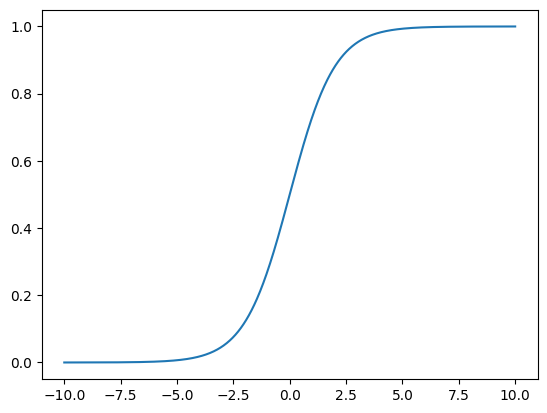

In [2]:
sigmoid_v = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))
pts = np.linspace(-10, 10, 1000)
plt.plot(pts, sigmoid_v(pts))

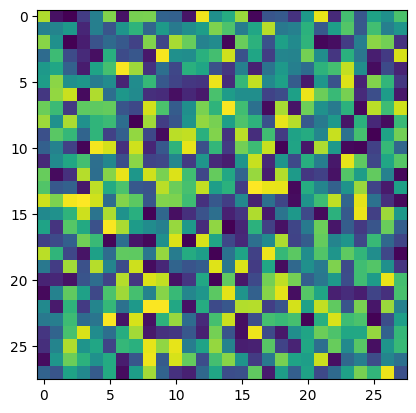

In [3]:
image = np.random.rand(28, 28)
plt.imshow(image)
# plt.imshow(train_X[0])

In [4]:
NPL = [4, 100, 100 ,1]
train_x = np.array([np.random.rand(NPL[0]) for _ in range(1000)], dtype=np.float32)
train_y = np.array([int(np.sum(x) > NPL[0] / 2) for x in train_x], dtype=np.float32)

In [37]:
test_x = np.random.rand(NPL[0]).astype(np.float32)
test_y = np.array(int(np.sum(test_x) > NPL[0] / 2), dtype=np.float32)
print(f"{test_x} sum = {np.sum(test_x)}, is greater than {NPL[0] / 2}?: {test_y} {bool(test_y)}")

[0.2785417  0.33577418 0.00111713 0.7463888 ] sum = 1.3618217706680298, is greater than 2.0?: 0.0 False


In [22]:
from NeuralNet import NeuralNet
net = NeuralNet(NPL=NPL, learning_rate=0.3)

In [23]:
net.train(train_x, train_y, epochs=10)

Epoch[0]: Loss = 0.3399381256419339
Epoch[1]: Loss = 0.28509220632125704
Epoch[2]: Loss = 0.2195120385444012
Epoch[3]: Loss = 0.19573395089380238
Epoch[4]: Loss = 0.18861807838101688
Epoch[5]: Loss = 0.18446177705948735
Epoch[6]: Loss = 0.18125852607318016
Epoch[7]: Loss = 0.17850429376681998
Epoch[8]: Loss = 0.1760042189342239
Epoch[9]: Loss = 0.17366407007183357


In [39]:
net.activations[0] = test_x
net.forward_prop()
test_loss = net.calculate_loss(test_y)
test_loss

0.0002152110465833208